# Popular Tourist Destinations in New Zealand
*A Webscrapping Project on Dynamic and Static Webpages*
* I Putu Agastya Harta Pratama
* Łukasz Brzoska

Faculty of Economic Sciences <br>
University of Warsaw <br>
Warsaw, Poland <br>
2025

Data obtained from the New Zealand's government Tourism Board (trading as Tourism New Zealand): https://www.newzealand.com/int/


With so much to offer, traveling to New Zealand may be quite burdensome. The national tourism board of New Zealand has created a website so that prospective tourists may see what the country has to offer. This project aims to informations from the website's top tourist destinations in New Zealand, along with the activities offered there, with the means of webscrapping.

Beautifulsoup and Selenium are both used in this project's scraping process. <br>
Selenium is used to automate specific user actions, so that the information may be accessed. <br> 
The static HTML content that was shown in each page's front end is then scraped using Beautifulsoup. It's also used for collecting links and texts. 

## Imports

In [1]:
# FOR DATA PROCESSING:
import pandas as pd
import numpy as np

# FOR MEASURING COMPUTATION TIME, CREATING FIXED DELAYS:
import time

# FOR APPLYING BEAUTIFULSOUP
from bs4 import BeautifulSoup

# FOR APPLYING SELENIUM:
import selenium 
from selenium import webdriver 
from webdriver_manager.firefox import GeckoDriverManager 
from selenium.webdriver.chrome.service import Service 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC 
from selenium.webdriver.common.by import By 
from selenium.common.exceptions import TimeoutException

# FOR SAVING DATA:
import pickle # pickle format of saved output

# FOR URL PARSING:
from urllib.parse import urljoin

# FOR SHOWING IMAGES IN THE NOTEBOOK
from IPython.display import Image

Once all of the necessary packages has been imported, we will now install the necessary driver. <br>
For the purpose of this project, we will be utilising the firefox webbrowser.

In [2]:
def save_object(obj, filename): 
    with open(filename, 'wb') as output:
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)
        
firefoxpath = GeckoDriverManager().install(); print("Driver Installed at: ", firefoxpath)

Driver Installed at:  /Users/agastyaharta/.wdm/drivers/geckodriver/mac64/v0.36.0/geckodriver


## Accessing Website

Firstly, we need to access this site. It leads us to the main page of New Zealand's Tourism page.

In [3]:
website = "https://www.newzealand.com/int/"

service_firefox = Service(executable_path = firefoxpath) 
options_firefox = webdriver.FirefoxOptions()
driver_firefox = webdriver.Firefox(service = service_firefox, options = options_firefox) 

driver_firefox.maximize_window()
driver_firefox.get(website)

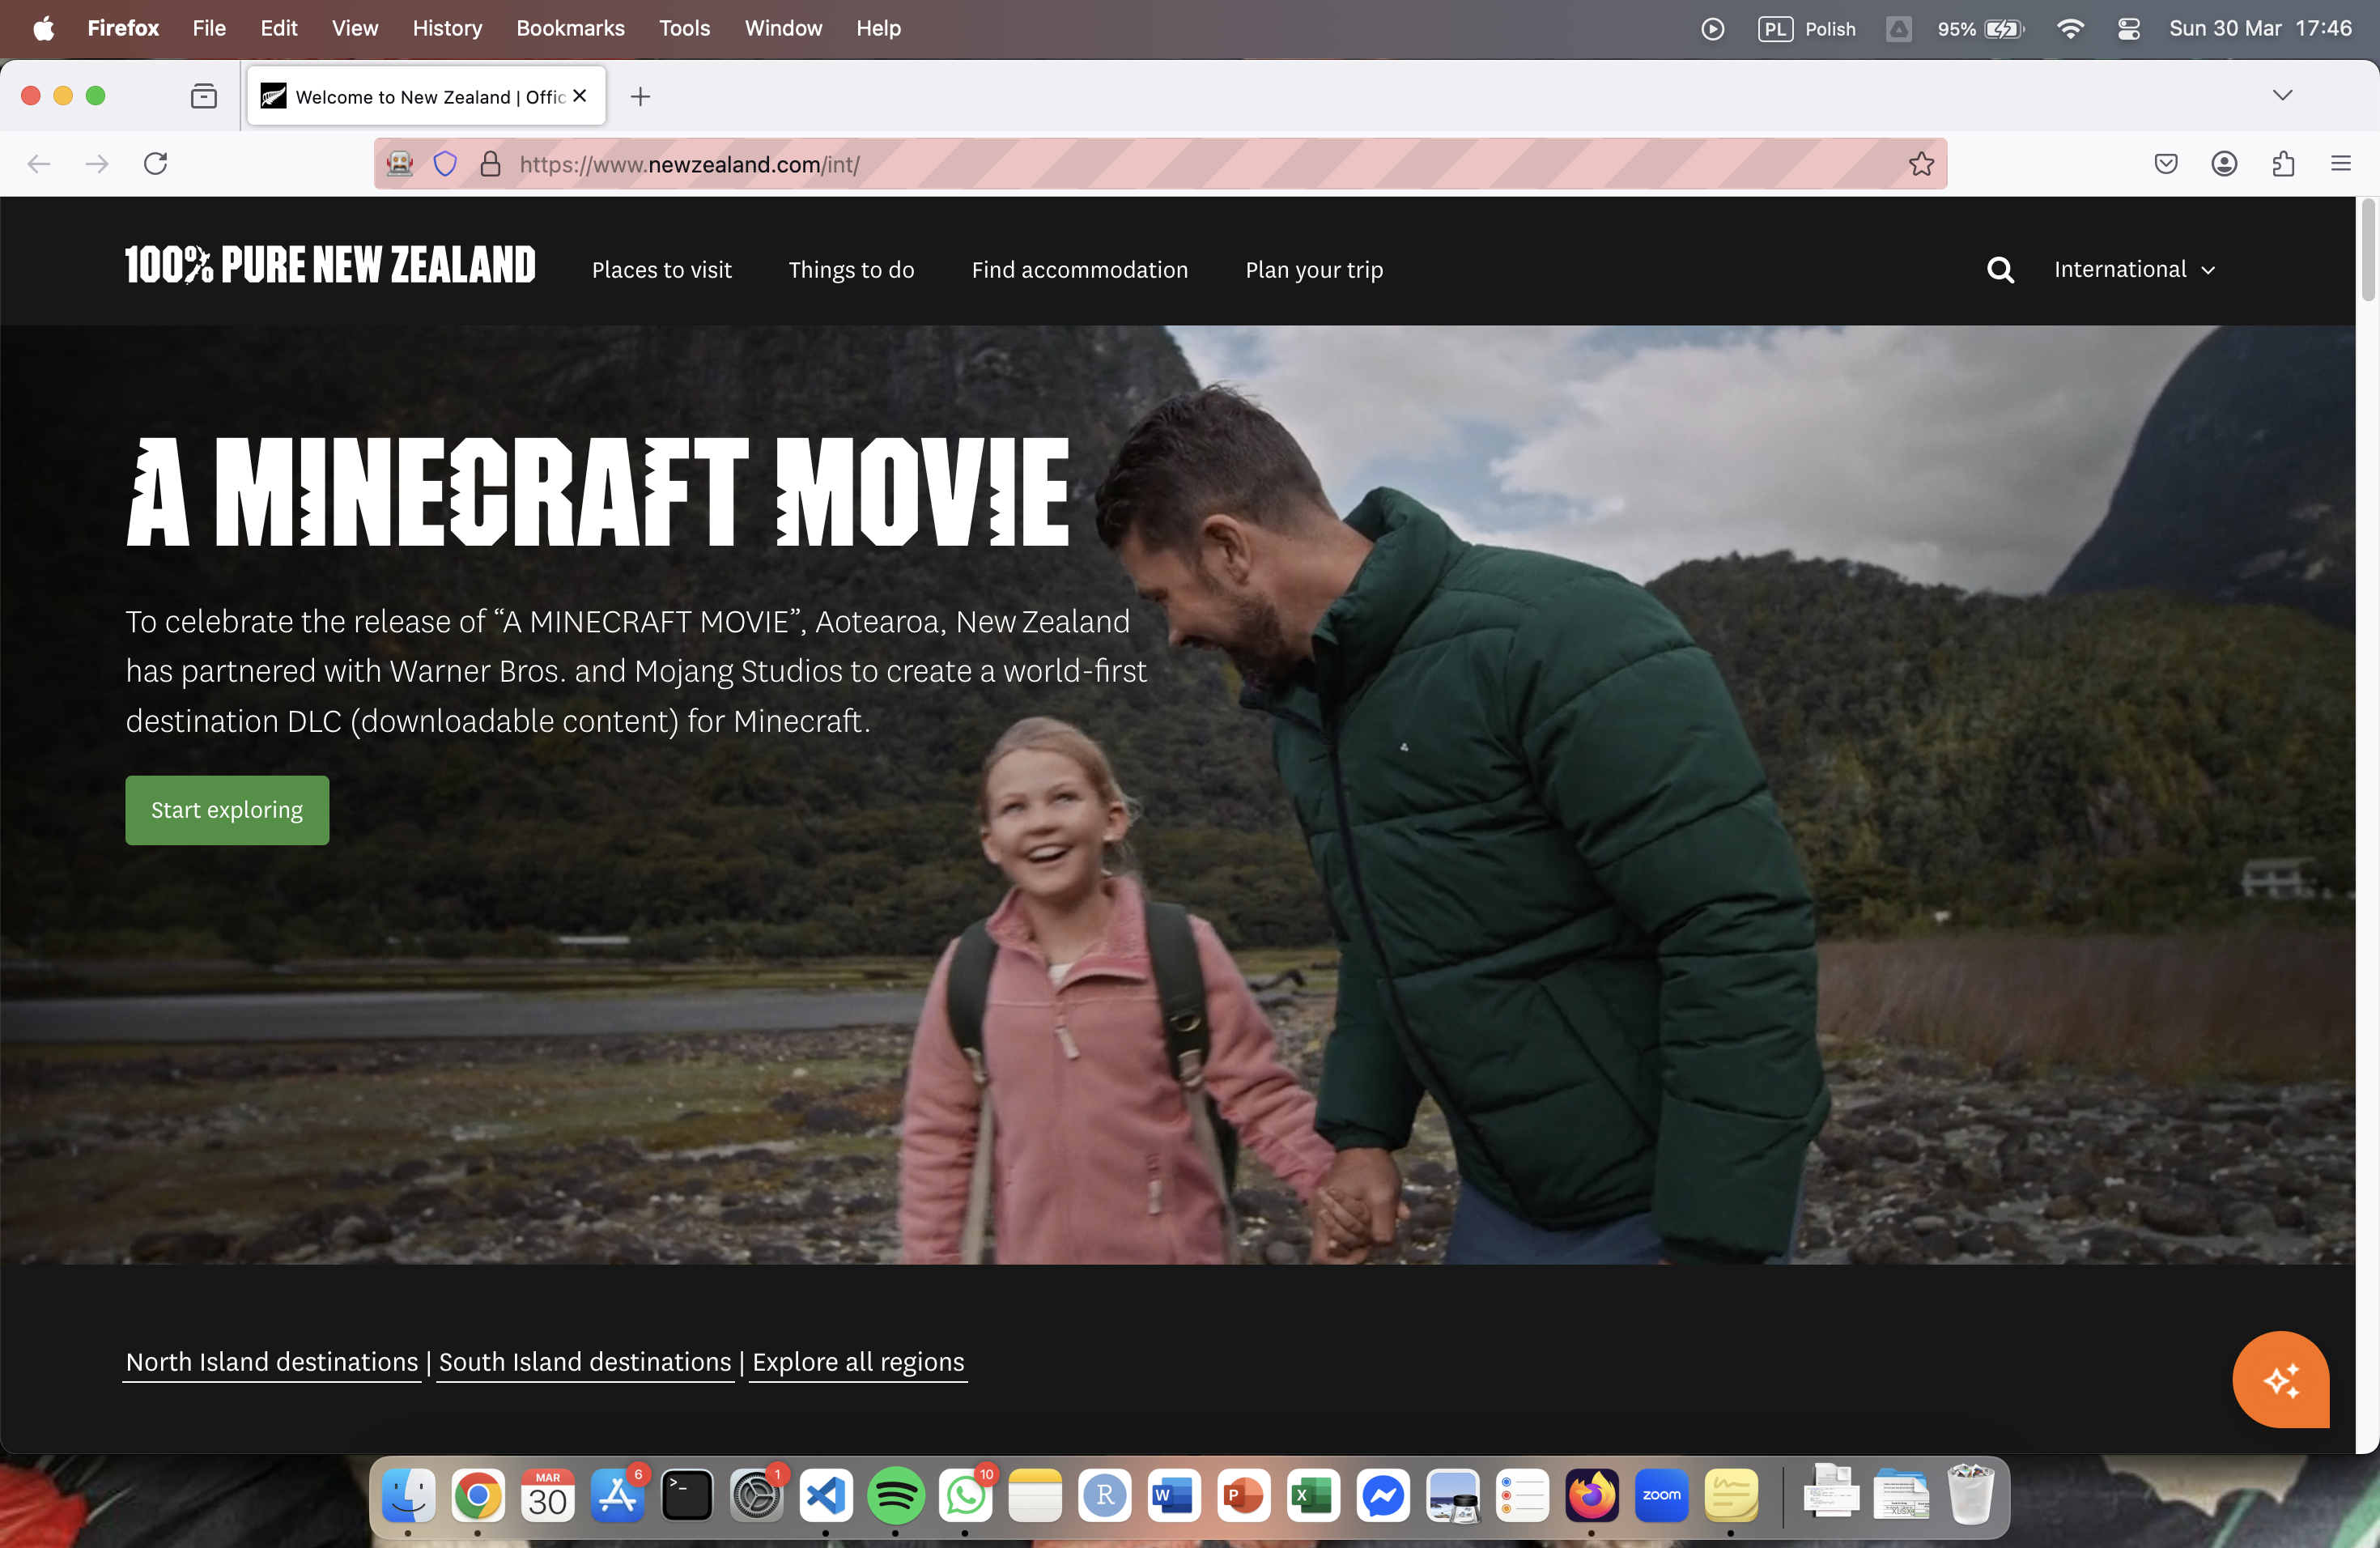

In [4]:
Image(filename='assets/1.png')

## Collecting Popular Places 

Next, we are acquiring four of New Zealand's most visited destinations, the majority of which are at the city or district level. <br> 
We are then gathering the city names and links, which is done by licking the search button displayed on the top right corner of this website. <br>
BeautifulSoup is used to gather the city names and URLs that are included in the HTML code, and Selenium is used to automate the button clicking. 

In [5]:
# Accessing website using Selenium
driver_firefox.get(website) 

start = time.time()
time.sleep(np.random.chisquare(3)+5) # + wait random time drawn from specific (strongly right-side-skewed) distribution to better imitate human behavior

# Clicking the search button to trigger 
target_button_xpath = "//i[@class='o-icon js-icon search-icon']//*[@class='icon search']"
target_button = WebDriverWait(driver_firefox, 4).until(
    EC.element_to_be_clickable((By.XPATH, target_button_xpath))
)
target_button.click()

In [6]:
# Using beautifulsoup to generate city labels and their corresponding links
html = driver_firefox.page_source # Refering from the website_search variable and converting it to string using page_source
soup = BeautifulSoup(html, "html.parser")

# Finding the right element for city ("Popular places to visit") because they share the same element with ("Popular things to do")
group_labels = soup.find_all("p", class_="popular-searches__group-label")
target_label = None
for label in group_labels:
    if "Popular places to visit" in label.text:
        target_label = label
        break

# Once target label are found, we are extracting each links in corresponds to each city names
popular_links = [] # List to save those elements
if target_label:
    city_list = target_label.find_next_sibling("ul", class_="popular-searches__group-items")
    for link in city_list.find_all("a", class_="popular-searches__group-item"):
        city_name = link.get_text(strip=True)
        href = urljoin(website, link["href"])
        popular_links.append((city_name, href))

# Printing the output of collected names of popular places (cities) and their corresponding search links
try: # Error handling
    print("Popular Places to Visit in New Zealand:")
    for city, url in popular_links:
        print(f"{city}: {url}")
except Exception as e: # Error handling
    print("Cannot retrieve data")

Popular Places to Visit in New Zealand:
Auckland: https://www.newzealand.com/int/utilities/search/?q=Auckland&type=popular
Queenstown: https://www.newzealand.com/int/utilities/search/?q=Queenstown&type=popular
Lake Tekapo / Takapō: https://www.newzealand.com/int/utilities/search/?q=Lake+Tekapo+%2F+Takap%C5%8D&type=popular
Wānaka: https://www.newzealand.com/int/utilities/search/?q=W%C4%81naka&type=popular


According to this website, in New Zealand there are four of the most visited cities. Our observations indicate that the quantity of activities varies by city. For example, Auckland has 740 listed, whereas Lake Tekapō has 82. We are only gathering 50 activities per city to maintain balance.

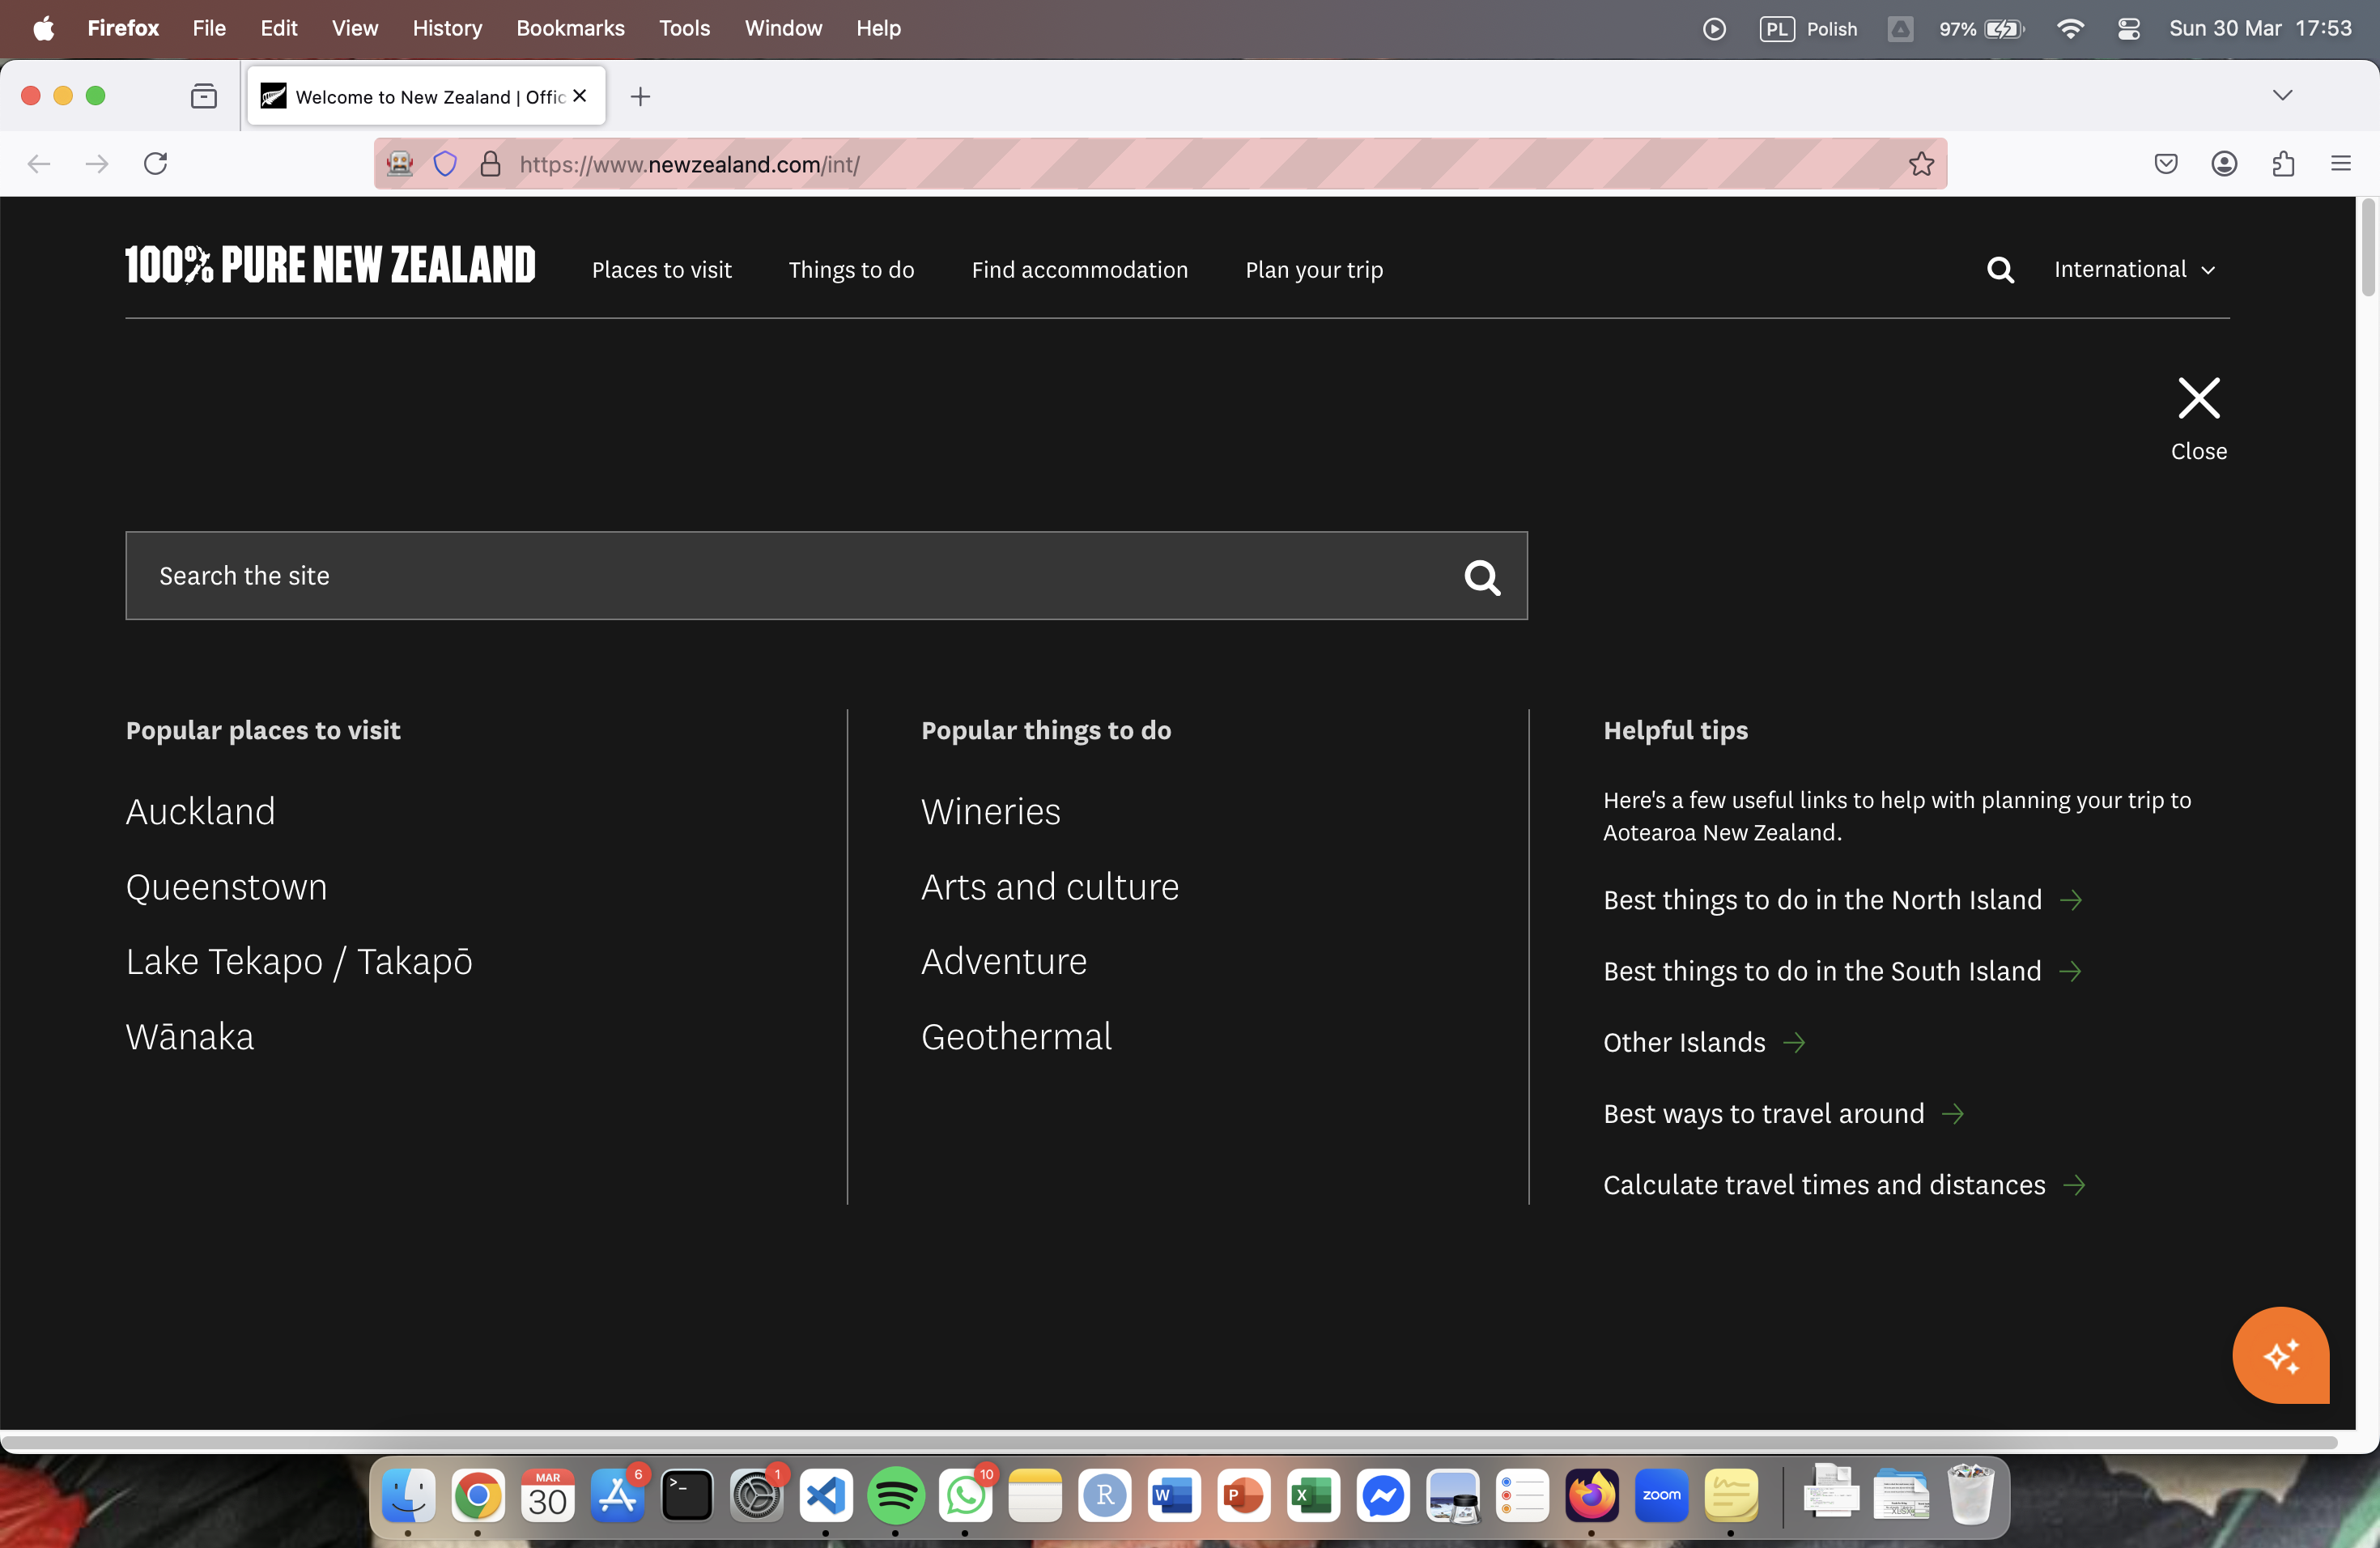

In [7]:
Image(filename='assets/2.png')

 Afterwards, we open a new browser tab for each city links that are stored in the popular_links list and stores the unique tab handle in a dictionary called city_tab_handles. By doing this, we can keep multiple city pages open in separate tabs and easily switch between them later using their cleaned-up city names as keys. It allows us to immediately access those city, and keep the scraping process organised across multiple locations without repeatedly closing and reopening browser windows.

In [8]:
city_tab_handles = {}

for city, url in popular_links:
    # Opening new tab
    driver_firefox.execute_script("window.open();")
    driver_firefox.switch_to.window(driver_firefox.window_handles[-1])
    
    # Load city URL
    driver_firefox.get(url)
    time.sleep(5)

    # Store tab handle
    handle_key = city.lower().replace(" ", "_").replace("/", "_")
    city_tab_handles[handle_key] = driver_firefox.current_window_handle

In [9]:
city_tab_handles

{'auckland': '8452eb93-0b3f-46e9-a0a0-e1a9b0e0e72f',
 'queenstown': 'ff1ede24-a2fe-4051-8a18-671d1ba41201',
 'lake_tekapo___takapō': 'cf89f768-8a4b-4327-8d37-3a8a8f9c2503',
 'wānaka': '40c563ca-a6b6-4062-aa78-b3be995e9232'}

## Auckland

We are now switching to the first city within the list. In here we are clicking the activities filter using. Since this website only load 10 results of activities, we have to click the "Show More Result" button. To do this, we are using Selenium to automate the button filter clicking, as well as the loading more results. <br>

We need to load all of the results that we want to scrape beforehand and then obtaining 

In [10]:
# Switching to "Auckland Tab"
driver_firefox.switch_to.window(city_tab_handles["auckland"])

time.sleep(5)
# Click on the "Activities" filter
try:
    filter_xpath = "//span[contains(text(),'Activities')]"
    filter_button = WebDriverWait(driver_firefox, 4).until(
        EC.element_to_be_clickable((By.XPATH, filter_xpath))
    )
    filter_button.click()
    print("Activities' filter clicked on Auckland page.")
except Exception as e:
    print(f"Failed to click 'Activities': {e}")
    
    

Activities' filter clicked on Auckland page.


In [11]:
time.sleep(np.random.chisquare(3)+5)
# Minimum clicks
click = 0 
# Maximum clicks (Each page loads 10 results)
max_clicks = 4
while click < max_clicks:
    try:
        load_more_xpath = '//*[@id="search-results"]/div[2]/div/div[3]/button'
        load_more_button = WebDriverWait(driver_firefox, 5).until(
            EC.element_to_be_clickable((By.XPATH, load_more_xpath))
        )

        # Click the button
        load_more_button.click()
        click += 1
        print("Loading more pages...")

        # Waiting content to load
        time.sleep(5)

    except TimeoutException:
        print("All pages loaded (no more button).")
        break

Loading more pages...
Loading more pages...
Loading more pages...
Loading more pages...


### Data Scraping for Auckland

#### Main Page

In [12]:
html = driver_firefox.page_source
soup = BeautifulSoup(html, "html.parser")

results_container = soup.find("div", class_="search-results__results")
activity_blocks = results_container.find_all("div", class_="results__wrapper") if results_container else []

# Saving each columns to list
titles_auckland = []
links_auckland= []
descriptions_auckland = []
images_auckland = []


for activity in activity_blocks:
    try:
        # Title
        title_path = activity.select_one("h4.results__title a")
        title = title_path.get_text(strip=True) if title_path else ""
        
        # Link
        link = title_path["href"] if title_path and "href" in title_path.attrs else ""

        # Description
        desc_path = activity.select_one("p.results__description")
        description = desc_path.get_text(strip=True) if desc_path else ""

        # Image
        img_path = activity.select_one("figure.results__photo img")
        img_url = img_path["src"] if img_path and "src" in img_path.attrs else ""

        # Append All
        titles_auckland.append(title)
        links_auckland.append(link)
        descriptions_auckland.append(description)
        images_auckland.append(img_url)

    except Exception as e:
        print(f"Skipping block due to: {e}")
        continue

#### Secondary Each Activities Page

In [13]:
street_addresses_auckland = []
localities_auckland = []
emails_auckland = []
phone_numbers_auckland = []

for idx, url in enumerate(links_auckland):
    try:
        driver_firefox.get(url)
        WebDriverWait(driver_firefox, 5).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, "p[itemtype='http://schema.org/LocalBusiness']"))
        )

        detail_soup = BeautifulSoup(driver_firefox.page_source, "html.parser")
        address_block = detail_soup.select_one("p[itemtype='http://schema.org/LocalBusiness']")

        # Street
        street_path = address_block.select_one("span[itemprop='streetAddress']")
        street_text = street_path.get_text(strip=True) if street_path else ""
        
        # Locality
        locality_path = address_block.select_one("span[itemprop='addressLocality']")
        locality_text = locality_path.get_text(strip=True) if locality_path else ""
        
        # Phone
        phone_path = driver_firefox.find_elements(By.CSS_SELECTOR, "a.js-phone-link")
        phone_number = phone_path[0].get_attribute("href").replace("tel:", "").strip() if phone_path else ""
        
        # Email
        email_tag = driver_firefox.find_elements(By.CSS_SELECTOR, "a[href^='mailto:']")
        email = email_tag[0].get_attribute("href").replace("mailto:", "").strip() if email_tag else ""

    except Exception as e:
        print(f"{idx+1}. Failed to extract data for: {links_auckland[idx]} — {e}")
        street_text = ""
        locality_text = ""

    street_addresses_auckland.append(street_text)
    localities_auckland.append(locality_text)
    emails_auckland.append(email)
    phone_numbers_auckland.append(phone_number)
    
    # Wait time to avoid being blocked
    wait_time = np.random.chisquare(3) + 4
    print(f"Sleeping for {wait_time:.2f} seconds...")
    time.sleep(wait_time)

Sleeping for 6.04 seconds...
Sleeping for 6.45 seconds...
Sleeping for 6.26 seconds...
Sleeping for 11.36 seconds...
Sleeping for 4.62 seconds...
Sleeping for 8.47 seconds...
Sleeping for 7.08 seconds...
Sleeping for 10.51 seconds...
Sleeping for 4.92 seconds...
Sleeping for 4.60 seconds...
Sleeping for 5.79 seconds...
Sleeping for 9.33 seconds...
Sleeping for 6.75 seconds...
Sleeping for 6.35 seconds...
Sleeping for 7.13 seconds...
Sleeping for 5.09 seconds...
Sleeping for 6.13 seconds...
Sleeping for 5.47 seconds...
Sleeping for 8.98 seconds...
Sleeping for 5.12 seconds...
Sleeping for 4.57 seconds...
Sleeping for 8.05 seconds...
Sleeping for 4.46 seconds...
Sleeping for 4.56 seconds...
Sleeping for 7.89 seconds...
Sleeping for 9.04 seconds...
Sleeping for 6.96 seconds...
Sleeping for 7.32 seconds...
Sleeping for 4.27 seconds...
Sleeping for 4.79 seconds...
Sleeping for 9.27 seconds...
Sleeping for 8.31 seconds...
Sleeping for 5.21 seconds...
Sleeping for 6.85 seconds...
Sleeping for

### Final Check of Auckland Scrapped Lists

In [14]:
auckland_scrapped_lists = [
    titles_auckland,
    links_auckland,
    descriptions_auckland,
    images_auckland,
    street_addresses_auckland,
    localities_auckland,
    emails_auckland,
    phone_numbers_auckland,
]

list_names = [
    "titles_auckland",
    "links_auckland",
    "descriptions_auckland",
    "images_auckland",
    "street_addresses_auckland",
    "localities_auckland",
    "emails_auckland",
    "phone_numbers_auckland",
]

for i, name in enumerate(auckland_scrapped_lists):
    print(f"List length of {list_names[i]}: {len(name)}")

List length of titles_auckland: 50
List length of links_auckland: 50
List length of descriptions_auckland: 50
List length of images_auckland: 50
List length of street_addresses_auckland: 50
List length of localities_auckland: 50
List length of emails_auckland: 50
List length of phone_numbers_auckland: 50


## Queenstown

In [15]:
driver_firefox.switch_to.window(city_tab_handles["queenstown"])

time.sleep(5)
# Click on the "Activities" filter
try:
    filter_xpath = "//span[contains(text(),'Activities')]"
    filter_button = WebDriverWait(driver_firefox, 4).until(
        EC.element_to_be_clickable((By.XPATH, filter_xpath))
    )
    filter_button.click()
    print("Activities' filter clicked on Queenstown page.")
except Exception as e:
    print(f"Failed to click 'Activities': {e}")

Activities' filter clicked on Queenstown page.


In [16]:
time.sleep(np.random.chisquare(3)+5)
click = 0 
max_clicks = 4
while click < max_clicks:
    try:
        load_more_xpath = '//*[@id="search-results"]/div[2]/div/div[3]/button'
        load_more_button = WebDriverWait(driver_firefox, 5).until(
            EC.element_to_be_clickable((By.XPATH, load_more_xpath))
        )

        # Click the button
        load_more_button.click()
        click += 1
        print("Loading more...")

        # Optional: wait for new content to load
        time.sleep(5)

    except TimeoutException:
        print("All activities loaded (no more button).")
        break

Loading more...
Loading more...
Loading more...
Loading more...


### Data Scraping for Queenstown

#### Main Page

In [17]:
html = driver_firefox.page_source
soup = BeautifulSoup(html, "html.parser")

results_container = soup.find("div", class_="search-results__results")
activity_blocks = results_container.find_all("div", class_="results__wrapper") if results_container else []

titles_queenstown = []
links_queenstown= []
descriptions_queenstown = []
images_queenstown = []

for activity in activity_blocks:
    try:
        # Title
        title_path = activity.select_one("h4.results__title a")
        title = title_path.get_text(strip=True) if title_path else ""
        
        # Link
        link = title_path["href"] if title_path and "href" in title_path.attrs else ""

        # Description
        desc_path = activity.select_one("p.results__description")
        description = desc_path.get_text(strip=True) if desc_path else ""

        # Image
        img_path = activity.select_one("figure.results__photo img")
        img_url = img_path["src"] if img_path and "src" in img_path.attrs else ""

        # Append All
        titles_queenstown.append(title)
        links_queenstown.append(link)
        descriptions_queenstown.append(description)
        images_queenstown.append(img_url)

    except Exception as e:
        print(f"Skipping block due to: {e}")
        continue

#### Secondary Each Activities Page

In [18]:
street_addresses_queenstown = []
localities_queenstown = []
emails_queenstown = []
phone_numbers_queenstown = []

for idx, url in enumerate(links_queenstown):
    try:
        driver_firefox.get(url)
        WebDriverWait(driver_firefox, 5).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, "p[itemtype='http://schema.org/LocalBusiness']"))
        )

        detail_soup = BeautifulSoup(driver_firefox.page_source, "html.parser")
        address_block = detail_soup.select_one("p[itemtype='http://schema.org/LocalBusiness']")

        # Street
        street_path = address_block.select_one("span[itemprop='streetAddress']")
        street_text = street_path.get_text(strip=True) if street_path else ""
        
        # Locality
        locality_path = address_block.select_one("span[itemprop='addressLocality']")
        locality_text = locality_path.get_text(strip=True) if locality_path else ""
        
        # Phone
        phone_path = driver_firefox.find_elements(By.CSS_SELECTOR, "a.js-phone-link")
        phone_number = phone_path[0].get_attribute("href").replace("tel:", "").strip() if phone_path else ""
        
        # Email
        email_tag = driver_firefox.find_elements(By.CSS_SELECTOR, "a[href^='mailto:']")
        email = email_tag[0].get_attribute("href").replace("mailto:", "").strip() if email_tag else ""

    except Exception as e:
        print(f"{idx+1}. Failed to extract data for: {links_queenstown[idx]} — {e}")
        street_text = ""
        locality_text = ""

    street_addresses_queenstown.append(street_text)
    localities_queenstown.append(locality_text)
    emails_queenstown.append(email)
    phone_numbers_queenstown.append(phone_number)
    
    wait_time = np.random.chisquare(3) + 4
    print(f"Sleeping for {wait_time:.2f} seconds...")
    time.sleep(wait_time)

Sleeping for 7.84 seconds...
Sleeping for 5.26 seconds...
Sleeping for 6.79 seconds...
Sleeping for 6.43 seconds...
Sleeping for 4.83 seconds...
Sleeping for 6.15 seconds...
Sleeping for 4.60 seconds...
Sleeping for 8.05 seconds...
Sleeping for 5.74 seconds...
Sleeping for 5.91 seconds...
Sleeping for 9.35 seconds...
Sleeping for 6.03 seconds...
Sleeping for 4.94 seconds...
Sleeping for 7.55 seconds...
Sleeping for 10.72 seconds...
Sleeping for 11.40 seconds...
Sleeping for 5.56 seconds...
Sleeping for 12.13 seconds...
Sleeping for 11.48 seconds...
Sleeping for 5.45 seconds...
Sleeping for 4.77 seconds...
Sleeping for 4.19 seconds...
Sleeping for 5.39 seconds...
Sleeping for 5.54 seconds...
Sleeping for 5.63 seconds...
Sleeping for 6.27 seconds...
Sleeping for 7.70 seconds...
Sleeping for 10.01 seconds...
Sleeping for 5.52 seconds...
Sleeping for 5.64 seconds...
Sleeping for 4.73 seconds...
Sleeping for 4.03 seconds...
Sleeping for 4.81 seconds...
Sleeping for 8.45 seconds...
Sleeping 

### Final Check of Queenstown Scrapped Lists

In [19]:
queenstown_scrapped_lists = [
    titles_queenstown,
    links_queenstown,
    descriptions_queenstown,
    images_queenstown,
    street_addresses_queenstown,
    localities_queenstown,
    emails_queenstown,
    phone_numbers_queenstown,
]

list_names = [
    "titles_queenstown",
    "links_queenstown",
    "descriptions_queenstown",
    "images_queenstown",
    "street_addresses_queenstown",
    "localities_queenstown",
    "emails_queenstown",
    "phone_numbers_queenstown",
]

for i, name in enumerate(queenstown_scrapped_lists):
    print(f"List length of {list_names[i]}: {len(name)}")

List length of titles_queenstown: 50
List length of links_queenstown: 50
List length of descriptions_queenstown: 50
List length of images_queenstown: 50
List length of street_addresses_queenstown: 50
List length of localities_queenstown: 50
List length of emails_queenstown: 50
List length of phone_numbers_queenstown: 50


## Lake Tekapo

In [20]:
driver_firefox.switch_to.window(city_tab_handles["lake_tekapo___takapō"])

time.sleep(5)
# Click on the "Activities" filter
try:
    filter_xpath = "//span[contains(text(),'Activities')]"
    filter_button = WebDriverWait(driver_firefox, 4).until(
        EC.element_to_be_clickable((By.XPATH, filter_xpath))
    )
    filter_button.click()
    print("Activities' filter clicked on Lake Tekapo / Takapō page.")
except Exception as e:
    print(f"Failed to click 'Activities': {e}")

Activities' filter clicked on Lake Tekapo / Takapō page.


In [21]:
time.sleep(np.random.chisquare(3)+5)
click = 0 
max_clicks = 4
while click < max_clicks:
    try:
        load_more_xpath = '//*[@id="search-results"]/div[2]/div/div[3]/button'
        load_more_button = WebDriverWait(driver_firefox, 5).until(
            EC.element_to_be_clickable((By.XPATH, load_more_xpath))
        )

        # Click the button
        load_more_button.click()
        click += 1
        print("Loading more...")

        # Optional: wait for new content to load
        time.sleep(5)

    except TimeoutException:
        print("All activities loaded (no more button).")
        break

Loading more...
Loading more...
Loading more...
Loading more...


### Data Scraping - Lake Tekapo

#### Main Page

In [22]:
html = driver_firefox.page_source
soup = BeautifulSoup(html, "html.parser")

results_container = soup.find("div", class_="search-results__results")
activity_blocks = results_container.find_all("div", class_="results__wrapper") if results_container else []

titles_tekapo = []
links_tekapo= []
descriptions_tekapo = []
images_tekapo = []

for activity in activity_blocks:
    try:
        # Title
        title_path = activity.select_one("h4.results__title a")
        title = title_path.get_text(strip=True) if title_path else ""
        
        # Link
        link = title_path["href"] if title_path and "href" in title_path.attrs else ""

        # Description
        desc_path = activity.select_one("p.results__description")
        description = desc_path.get_text(strip=True) if desc_path else ""

        # Image
        img_path = activity.select_one("figure.results__photo img")
        img_url = img_path["src"] if img_path and "src" in img_path.attrs else ""

        # Append All
        titles_tekapo.append(title)
        links_tekapo.append(link)
        descriptions_tekapo.append(description)
        images_tekapo.append(img_url)

    except Exception as e:
        print(f"Skipping block due to: {e}")
        continue

#### Secondary Each Activities Page

In [23]:
street_addresses_tekapo = []
localities_tekapo = []
emails_tekapo = []
phone_numbers_tekapo = []

for idx, url in enumerate(links_tekapo):
    try:
        driver_firefox.get(url)
        WebDriverWait(driver_firefox, 5).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, "p[itemtype='http://schema.org/LocalBusiness']"))
        )

        detail_soup = BeautifulSoup(driver_firefox.page_source, "html.parser")
        address_block = detail_soup.select_one("p[itemtype='http://schema.org/LocalBusiness']")

        # Street
        street_path = address_block.select_one("span[itemprop='streetAddress']")
        street_text = street_path.get_text(strip=True) if street_path else ""
        
        # Locality
        locality_path = address_block.select_one("span[itemprop='addressLocality']")
        locality_text = locality_path.get_text(strip=True) if locality_path else ""
        
        # Phone
        phone_path = driver_firefox.find_elements(By.CSS_SELECTOR, "a.js-phone-link")
        phone_number = phone_path[0].get_attribute("href").replace("tel:", "").strip() if phone_path else ""
        
        # Email
        email_tag = driver_firefox.find_elements(By.CSS_SELECTOR, "a[href^='mailto:']")
        email = email_tag[0].get_attribute("href").replace("mailto:", "").strip() if email_tag else ""

    except Exception as e:
        print(f"{idx+1}. Failed to extract data for: {links_tekapo[idx]} — {e}")
        street_text = ""
        locality_text = ""

    street_addresses_tekapo.append(street_text)
    localities_tekapo.append(locality_text)
    emails_tekapo.append(email)
    phone_numbers_tekapo.append(phone_number)
    
    wait_time = np.random.chisquare(3) + 4
    print(f"Sleeping for {wait_time:.2f} seconds...")
    time.sleep(wait_time)

Sleeping for 4.04 seconds...
Sleeping for 8.38 seconds...
Sleeping for 5.89 seconds...
Sleeping for 4.65 seconds...
Sleeping for 4.75 seconds...
Sleeping for 4.83 seconds...
Sleeping for 5.57 seconds...
Sleeping for 6.40 seconds...
Sleeping for 7.43 seconds...
Sleeping for 4.31 seconds...
Sleeping for 14.30 seconds...
Sleeping for 5.94 seconds...
Sleeping for 5.90 seconds...
Sleeping for 8.79 seconds...
Sleeping for 11.88 seconds...
Sleeping for 4.57 seconds...
Sleeping for 11.20 seconds...
Sleeping for 4.51 seconds...
Sleeping for 6.88 seconds...
Sleeping for 6.88 seconds...
Sleeping for 5.72 seconds...
Sleeping for 7.01 seconds...
Sleeping for 13.76 seconds...
Sleeping for 7.18 seconds...
Sleeping for 4.72 seconds...
Sleeping for 6.77 seconds...
Sleeping for 6.45 seconds...
Sleeping for 6.87 seconds...
Sleeping for 6.87 seconds...
Sleeping for 6.94 seconds...
Sleeping for 5.68 seconds...
Sleeping for 6.25 seconds...
Sleeping for 4.76 seconds...
Sleeping for 9.24 seconds...
Sleeping f

### Final Check of Lake Tekapo Scrapped Lists

In [24]:
tekapo_scrapped_lists = [
    titles_tekapo,
    links_tekapo,
    descriptions_tekapo,
    images_tekapo,
    street_addresses_tekapo,
    localities_tekapo,
    emails_tekapo,
    phone_numbers_tekapo,
]

list_names = [
    "titles_tekapo",
    "links_tekapo",
    "descriptions_tekapo",
    "images_tekapo",
    "street_addresses_tekapo",
    "localities_tekapo",
    "emails_tekapo",
    "phone_numbers_tekapo",
]

for i, name in enumerate(tekapo_scrapped_lists):
    print(f"List length of {list_names[i]}: {len(name)}")

List length of titles_tekapo: 50
List length of links_tekapo: 50
List length of descriptions_tekapo: 50
List length of images_tekapo: 50
List length of street_addresses_tekapo: 50
List length of localities_tekapo: 50
List length of emails_tekapo: 50
List length of phone_numbers_tekapo: 50


## Wanaka

In [25]:
driver_firefox.switch_to.window(city_tab_handles["wānaka"])

time.sleep(5)
# Click on the "Activities" filter
try:
    filter_xpath = "//span[contains(text(),'Activities')]"
    filter_button = WebDriverWait(driver_firefox, 4).until(
        EC.element_to_be_clickable((By.XPATH, filter_xpath))
    )
    filter_button.click()
    print("Activities' filter clicked on Wanaka page.")
except Exception as e:
    print(f"Failed to click 'Activities': {e}")

Activities' filter clicked on Wanaka page.


In [26]:
time.sleep(np.random.chisquare(3)+5)
click = 0 
max_clicks = 4
while click < max_clicks:
    try:
        load_more_xpath = '//*[@id="search-results"]/div[2]/div/div[3]/button'
        load_more_button = WebDriverWait(driver_firefox, 5).until(
            EC.element_to_be_clickable((By.XPATH, load_more_xpath))
        )

        # Click the button
        load_more_button.click()
        click += 1
        print("Loading more...")

        # Optional: wait for new content to load
        time.sleep(5)

    except TimeoutException:
        print("All activities loaded (no more button).")
        break

Loading more...
Loading more...
Loading more...
Loading more...


### Data Scraping - Wanaka

#### Main Page

In [27]:
html = driver_firefox.page_source
soup = BeautifulSoup(html, "html.parser")

results_container = soup.find("div", class_="search-results__results")
activity_blocks = results_container.find_all("div", class_="results__wrapper") if results_container else []

titles_wanaka = []
links_wanaka= []
descriptions_wanaka = []
images_wanaka = []

for activity in activity_blocks:
    try:
        # Title
        title_path = activity.select_one("h4.results__title a")
        title = title_path.get_text(strip=True) if title_path else ""
        
        # Link
        link = title_path["href"] if title_path and "href" in title_path.attrs else ""

        # Description
        desc_path = activity.select_one("p.results__description")
        description = desc_path.get_text(strip=True) if desc_path else ""

        # Image
        img_path = activity.select_one("figure.results__photo img")
        img_url = img_path["src"] if img_path and "src" in img_path.attrs else ""

        # Append All
        titles_wanaka.append(title)
        links_wanaka.append(link)
        descriptions_wanaka.append(description)
        images_wanaka.append(img_url)

    except Exception as e:
        print(f"Skipping block due to: {e}")
        continue

#### Secondary Each Activities Page

In [28]:
street_addresses_wanaka = []
localities_wanaka = []
emails_wanaka = []
phone_numbers_wanaka = []

for idx, url in enumerate(links_wanaka):
    try:
        driver_firefox.get(url)
        WebDriverWait(driver_firefox, 5).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, "p[itemtype='http://schema.org/LocalBusiness']"))
        )

        detail_soup = BeautifulSoup(driver_firefox.page_source, "html.parser")
        address_block = detail_soup.select_one("p[itemtype='http://schema.org/LocalBusiness']")

        # Street
        street_path = address_block.select_one("span[itemprop='streetAddress']")
        street_text = street_path.get_text(strip=True) if street_path else ""
        
        # Locality
        locality_path = address_block.select_one("span[itemprop='addressLocality']")
        locality_text = locality_path.get_text(strip=True) if locality_path else ""
        
        # Phone
        phone_path = driver_firefox.find_elements(By.CSS_SELECTOR, "a.js-phone-link")
        phone_number = phone_path[0].get_attribute("href").replace("tel:", "").strip() if phone_path else ""
        
        # Email
        email_tag = driver_firefox.find_elements(By.CSS_SELECTOR, "a[href^='mailto:']")
        email = email_tag[0].get_attribute("href").replace("mailto:", "").strip() if email_tag else ""

    except Exception as e:
        print(f"{idx+1}. Failed to extract data for: {links_wanaka[idx]} — {e}")
        street_text = ""
        locality_text = ""

    street_addresses_wanaka.append(street_text)
    localities_wanaka.append(locality_text)
    emails_wanaka.append(email)
    phone_numbers_wanaka.append(phone_number)
    
    wait_time = np.random.chisquare(3) + 4
    print(f"Sleeping for {wait_time:.2f} seconds...")
    time.sleep(wait_time)

Sleeping for 5.57 seconds...
Sleeping for 4.80 seconds...
Sleeping for 6.53 seconds...
Sleeping for 7.34 seconds...
Sleeping for 5.50 seconds...
Sleeping for 5.28 seconds...
Sleeping for 5.88 seconds...
Sleeping for 9.50 seconds...
Sleeping for 9.67 seconds...
Sleeping for 5.16 seconds...
Sleeping for 11.12 seconds...
Sleeping for 7.60 seconds...
Sleeping for 10.99 seconds...
Sleeping for 8.32 seconds...
Sleeping for 7.77 seconds...
Sleeping for 7.12 seconds...
Sleeping for 4.40 seconds...
Sleeping for 4.53 seconds...
Sleeping for 4.83 seconds...
Sleeping for 6.95 seconds...
Sleeping for 10.18 seconds...
Sleeping for 4.73 seconds...
Sleeping for 15.20 seconds...
Sleeping for 4.54 seconds...
Sleeping for 4.87 seconds...
Sleeping for 8.50 seconds...
Sleeping for 8.93 seconds...
Sleeping for 6.33 seconds...
Sleeping for 4.75 seconds...
Sleeping for 9.14 seconds...
Sleeping for 5.07 seconds...
Sleeping for 6.90 seconds...
Sleeping for 4.68 seconds...
Sleeping for 10.68 seconds...
Sleeping 

### Final Check of Wanaka Scrapped Lists

In [29]:
wanaka_scrapped_lists = [
    titles_wanaka,
    links_wanaka,
    descriptions_wanaka,
    images_wanaka,
    street_addresses_wanaka,
    localities_wanaka,
    emails_wanaka,
    phone_numbers_wanaka,
]

list_names = [
    "titles_wanaka",
    "links_wanaka",
    "descriptions_wanaka",
    "images_wanaka",
    "street_addresses_wanaka",
    "localities_wanaka",
    "emails_wanaka",
    "phone_numbers_wanaka",
]

for i, name in enumerate(wanaka_scrapped_lists):
    print(f"List length of {list_names[i]}: {len(name)}")

List length of titles_wanaka: 50
List length of links_wanaka: 50
List length of descriptions_wanaka: 50
List length of images_wanaka: 50
List length of street_addresses_wanaka: 50
List length of localities_wanaka: 50
List length of emails_wanaka: 50
List length of phone_numbers_wanaka: 50


## Convert to Dataframe

In [30]:

data_auckland = pd.DataFrame({
    "place": ["Auckland"] * len(titles_auckland),
    "activities": titles_auckland,
    "activity_descriptions": descriptions_auckland,
    "activity_address_streets": street_addresses_auckland,
    "activity_localities": localities_auckland,
    "activity_emails": emails_auckland,
    "activity_phone_numbers": phone_numbers_auckland,
    "activity_links": links_auckland,
    "activity_images" : images_auckland
})


data_queenstown = pd.DataFrame({
    "place": ["Queenstown"] * len(titles_queenstown),
    "activities": titles_queenstown,
    "activity_descriptions": descriptions_queenstown,
    "activity_address_streets": street_addresses_queenstown,
    "activity_localities": localities_queenstown,
    "activity_emails": emails_queenstown,
    "activity_phone_numbers": phone_numbers_queenstown,
    "activity_links": links_queenstown,
    "activity_images" : images_queenstown
})

data_tekapo = pd.DataFrame({
    "place": ["Tekapo"] * len(titles_tekapo),
    "activities": titles_tekapo,
    "activity_descriptions": descriptions_tekapo,
    "activity_address_streets": street_addresses_tekapo,
    "activity_localities": localities_tekapo,
    "activity_emails": emails_tekapo,
    "activity_phone_numbers": phone_numbers_tekapo,
    "activity_links": links_tekapo,
    "activity_images" : images_tekapo
})

data_wanaka = pd.DataFrame({
    "place": ["Wanaka"] * len(titles_wanaka),
    "activities": titles_wanaka,
    "activity_descriptions": descriptions_wanaka,
    "activity_address_streets": street_addresses_wanaka,
    "activity_localities": localities_wanaka,
    "activity_emails": emails_wanaka,
    "activity_phone_numbers": phone_numbers_wanaka,
    "activity_links": links_wanaka,
    "activity_images" : images_wanaka
})

In [31]:
data_auckland.tail(3)

place                            activities  \
47  Auckland  Zahn - Auckland Wedding Photographer   
48  Auckland     Miller Road Fragrances - Auckland   
49  Auckland          Sky Tower - SkyCity Auckland   

                                activity_descriptions  \
47  I photograph honest moments, beautiful places,...   
48  Hand crafted in New Zealand, Miller Road, prov...   
49  The iconic 328 metre Sky Tower has stood tall ...   

          activity_address_streets activity_localities  \
47        139 Victoria Street West    Auckland Central   
48               182 Ponsonby Road    Auckland Central   
49  Cnr Victoria & Federal Streets    Auckland Central   

              activity_emails activity_phone_numbers  \
47            zahn@Zahn.co.nz        +64 21 156 3386   
48  auckland@millerroad.co.nz         +64 9 218 7511   
49    enquiries@skycity.co.nz         +64 9 363 6000   

                                       activity_links  \
47  https://www.newzealand.com/int/plan/business/z...   
48  https://www.newzealand.com/int/plan/business/m...   
49  https://www.newzealand.com/int/plan/business/s...   

                                      activity_images  
47  https://www.newzealand.com/assets/externally-m...  
48  https://www.newzealand.com/assets/externally-m...  
49  https://www.newzealand.com/assets/externally-m...

In [32]:
data_queenstown.tail(3)

place                             activities  \
47  Queenstown  Queenstown Elopements ~ Aroha Package   
48  Queenstown   Queenstown Elopements ~ Amor Package   
49  Queenstown  Biking Queenstown Trail - No Boundary   

                                activity_descriptions  \
47  The ultimate intimate experience for your big ...   
48  The perfect way to cover all the essentials fo...   
49  Queenstown Trail is a spectacular trail networ...   

   activity_address_streets activity_localities  \
47         166 Glenda Drive            Frankton   
48         166 Glenda Drive            Frankton   
49         30 Lookout Drive  Central Queenstown   

                  activity_emails activity_phone_numbers  \
47  info@elopementsqueenstown.com         +64 21 863 628   
48  info@elopementsqueenstown.com         +64 21 863 628   
49         hello@noboundary.co.nz        +64 21 245 4225   

                                       activity_links  \
47  https://www.newzealand.com/int/plan/business/q...   
48  https://www.newzealand.com/int/plan/business/q...   
49  https://www.newzealand.com/int/plan/business/b...   

                                      activity_images  
47  https://www.newzealand.com/assets/externally-m...  
48  https://www.newzealand.com/assets/externally-m...  
49  https://www.newzealand.com/assets/Tourism-NZ/O...

In [33]:
data_tekapo.tail(3)

place                                         activities  \
47  Tekapo         Scenic Helicopter Flights from Lake Tekapo   
48  Tekapo  Chameleon Stargazing - Shared Tour at our Loca...   
49  Tekapo                                  Tekapo Adventures   

                                activity_descriptions  \
47  Enjoy an amazing helicopter flight from Lake T...   
48  Quality and budget Tekapo stargazing tours. Le...   
49  Tekapo Adventures offers visitors the opportun...   

             activity_address_streets activity_localities  \
47  State Highway 8, Tekapo Aerodrome  Lake Tekapo/Takapō   
48                     2 Rapuwai Lane  Lake Tekapo/Takapō   
49                    8 Rapuwai Lane,  Lake Tekapo/Takapō   

                 activity_emails activity_phone_numbers  \
47        sales@airsafaris.co.nz         +64 3 680 6880   
48  info@chameleonstargazing.com        +64 27 365 7091   
49     info@tekapoadventures.com       +64 20 4156 4900   

                                       activity_links  \
47  https://www.newzealand.com/int/plan/business/a...   
48  https://www.newzealand.com/int/plan/business/s...   
49  https://www.newzealand.com/int/plan/business/t...   

                                      activity_images  
47  https://www.newzealand.com/assets/externally-m...  
48  https://www.newzealand.com/assets/externally-m...  
49  https://www.newzealand.com/assets/externally-m...

In [34]:
data_wanaka.tail(3)

place                                      activities  \
47  Wanaka          Wanaka Water Taxi Mou Waho Island Tour   
48  Wanaka           Private 1 Day Wanaka Photography Tour   
49  Wanaka  Lakeland Jet Boat | Lake Wanaka & Clutha River   

                                activity_descriptions  \
47  Come and join us on a trip to our favourite pl...   
48  Wanaka is one of the most photographed destina...   
49  Experience one of New Zealand’s most iconic ad...   

        activity_address_streets activity_localities  \
47  Wanaka Marina, Lakeside Road         Wānaka Town   
48                        Wanaka         Wānaka Town   
49            100 Ardmore Street         Wānaka Town   

                    activity_emails activity_phone_numbers  \
47       info@wanakawatertaxi.co.nz        +64 21 1520 689   
48  info@photographyworkshops.co.nz        +64 27 261 4417   
49       contact@lakelandwanaka.com         +64 3 443 7495   

                                       activity_links  \
47  https://www.newzealand.com/int/plan/business/w...   
48  https://www.newzealand.com/int/plan/business/-...   
49  https://www.newzealand.com/int/plan/business/c...   

                                      activity_images  
47  https://www.newzealand.com/assets/externally-m...  
48  https://www.newzealand.com/assets/externally-m...  
49  https://www.newzealand.com/assets/externally-m...

In [35]:
data_all_city = []

data_all_city.append(data_auckland)
data_all_city.append(data_queenstown)
data_all_city.append(data_tekapo)
data_all_city.append(data_wanaka)

final_data = pd.concat(data_all_city, ignore_index=True)

In [36]:
final_data

place                                      activities  \
0    Auckland                     Auckland Scenic Tour 3 Hour   
1    Auckland                               Odysseum Auckland   
2    Auckland                                  Auckland Tours   
3    Auckland                                 Auckland Museum   
4    Auckland                               Breakout Auckland   
..        ...                                             ...   
195    Wanaka                         Southern Lakes Helibike   
196    Wanaka                               Boat & Bike Combo   
197    Wanaka          Wanaka Water Taxi Mou Waho Island Tour   
198    Wanaka           Private 1 Day Wanaka Photography Tour   
199    Wanaka  Lakeland Jet Boat | Lake Wanaka & Clutha River   

                                 activity_descriptions  \
0    Auckland Scenic Tour travelling over the Auckl...   
1    Odysseum Auckland has two amazing entertainmen...   
2    Enjoy a range of small group tours with Bush a...   
3    Auckland Museum tells the story of New Zealand...   
4    Breakout Auckland is a unique, fun activity fo...   
..                                                 ...   
195  The ultimate day out in Wanaka: Scenic helicop...   
196  The only guided Boat/Bike Combo on Lake Wanaka...   
197  Come and join us on a trip to our favourite pl...   
198  Wanaka is one of the most photographed destina...   
199  Experience one of New Zealand’s most iconic ad...   

         activity_address_streets  activity_localities  \
0           6 Customs Street East     Auckland Central   
1            291-297 Queen Street     Auckland Central   
2             3A Enterprise Drive     Auckland Central   
3                 Auckland Domain     Auckland Central   
4                 490 Ti Rakau Dr  East Tāmaki Heights   
..                            ...                  ...   
195             10 Lloyd Dunn Ave          Wānaka Town   
196            103 Ardmore Street          Wānaka Town   
197  Wanaka Marina, Lakeside Road          Wānaka Town   
198                        Wanaka          Wānaka Town   
199            100 Ardmore Street          Wānaka Town   

                     activity_emails activity_phone_numbers  \
0         waihekewinetours@gmail.com         +64 21 438 222   
1            auckland@odysseum.co.nz         +64 9 365 1145   
2            info@bushandbeach.co.nz         +64 9 837 4130   
3            info@aucklandmuseum.com         +64 9 309 0443   
4              botany@paradice.co.nz         +64 9 273 2999   
..                               ...                    ...   
195   info@southernlakeshelibike.com         +64 3 443 4000   
196          info@discoverwanaka.com         +64 21 919 468   
197       info@wanakawatertaxi.co.nz        +64 21 1520 689   
198  info@photographyworkshops.co.nz        +64 27 261 4417   
199       contact@lakelandwanaka.com         +64 3 443 7495   

                                        activity_links  \
0    https://www.newzealand.com/int/plan/business/a...   
1    https://www.newzealand.com/int/plan/business/o...   
2    https://www.newzealand.com/int/plan/business/a...   
3    https://www.newzealand.com/int/plan/business/a...   
4    https://www.newzealand.com/int/plan/business/b...   
..                                                 ...   
195  https://www.newzealand.com/int/plan/business/s...   
196  https://www.newzealand.com/int/plan/business/w...   
197  https://www.newzealand.com/int/plan/business/w...   
198  https://www.newzealand.com/int/plan/business/-...   
199  https://www.newzealand.com/int/plan/business/c...   

                                       activity_images  
0    https://www.newzealand.com/assets/externally-m...  
1    https://www.newzealand.com/assets/externally-m...  
2    https://www.newzealand.com/assets/externally-m...  
3    https://www.newzealand.com/assets/externally-m...  
4    https://www.newzealand.com/assets/externally-m...  
..                                   

## Export to Pickle

In [37]:
final_data.to_pickle("pickle_dump/all_city_activities.pkl")
data_auckland.to_pickle("pickle_dump/auckland_city_activities.pkl")
data_queenstown.to_pickle("pickle_dump/queenstown_city_activities.pkl")
data_tekapo.to_pickle("pickle_dump/tekapo_city_activities.pkl")
data_wanaka.to_pickle("pickle_dump/wanaka_city_activities.pkl")

In [38]:
driver_firefox.quit()

## Mitigation

### Rotation of User Agents

In [39]:
#service_firefox = Service(executable_path = firefoxpath) 
#options_firefox = webdriver.FirefoxOptions(); options_firefox.add_argument("--headless")
#driver_firefox = webdriver.Firefox(service = service_firefox, options = options_firefox)

#driver_firefox.get("https://us.cnn.com/")

# returns our current User-Agent
#user_agent = driver_firefox.execute_script("return navigator.userAgent;")
#print("Current User-Agent:", user_agent)

#driver_firefox.quit()

### Rotation of IP Addresses